In [2]:
import cv2
import numpy as np
import numpy.random as npr
import pandas as pd
import os

import matplotlib.pyplot as plt
import skimage as sk
import skimage.io as skio
%matplotlib inline


In [78]:
#im = np.load(r'/scratch/users/jiaxun1218/saved_models/vgg19/009/epoch-100/50/nearest-1_act.npy')
#im_1 = skio.imread(r'/scratch/users/jiaxun1218/saved_models/vgg19/009/epoch-100/0/nearest-2_high_act_patch_in_original_img.png')
#im_1 = sk.img_as_float(im_1)

In [79]:
#plt.imshow(im)

In [58]:
#fig, axes = plt.subplots(1, 3, figsize=(30, 10))
#for i in range(3):
#    im = skio.imread('/scratch/users/jiaxun1218/saved_models/vgg19/009/epoch-70/78/nearest-'+str(i+1)+'_high_act_patch_in_original_img.png')
#    axes[i].imshow(im)
#plt.imshow(im_1)

In [85]:
## Get all the dirs for different prototypes
root_dirs = [
    "vgg19/009/epoch-100/"
]
dirs = []
for i in range(0, len(root_dirs)):
    for j in range(2000):
        dirs.append(r'/scratch/users/jiaxun1218/saved_models/' + root_dirs[i] + str(j) + '/')

In [86]:
print(len(dirs))
print(dirs[0])

2000
/scratch/users/jiaxun1218/saved_models/vgg19/009/epoch-100/0/


In [87]:
# Hyperparameters for prototype comparison
k = 3 # how many to compare?

In [88]:
csv_name = "../human_comparisons/comparison_009_1.csv"
if os.path.exists(csv_name):
    comp_df = pd.read_csv(csv_name)
    
else:
    comp_df = pd.DataFrame({"left": [], "right": [], "comp": []})

In [89]:
comp_df.head()

Empty DataFrame
Columns: [left, right, comp]
Index: []

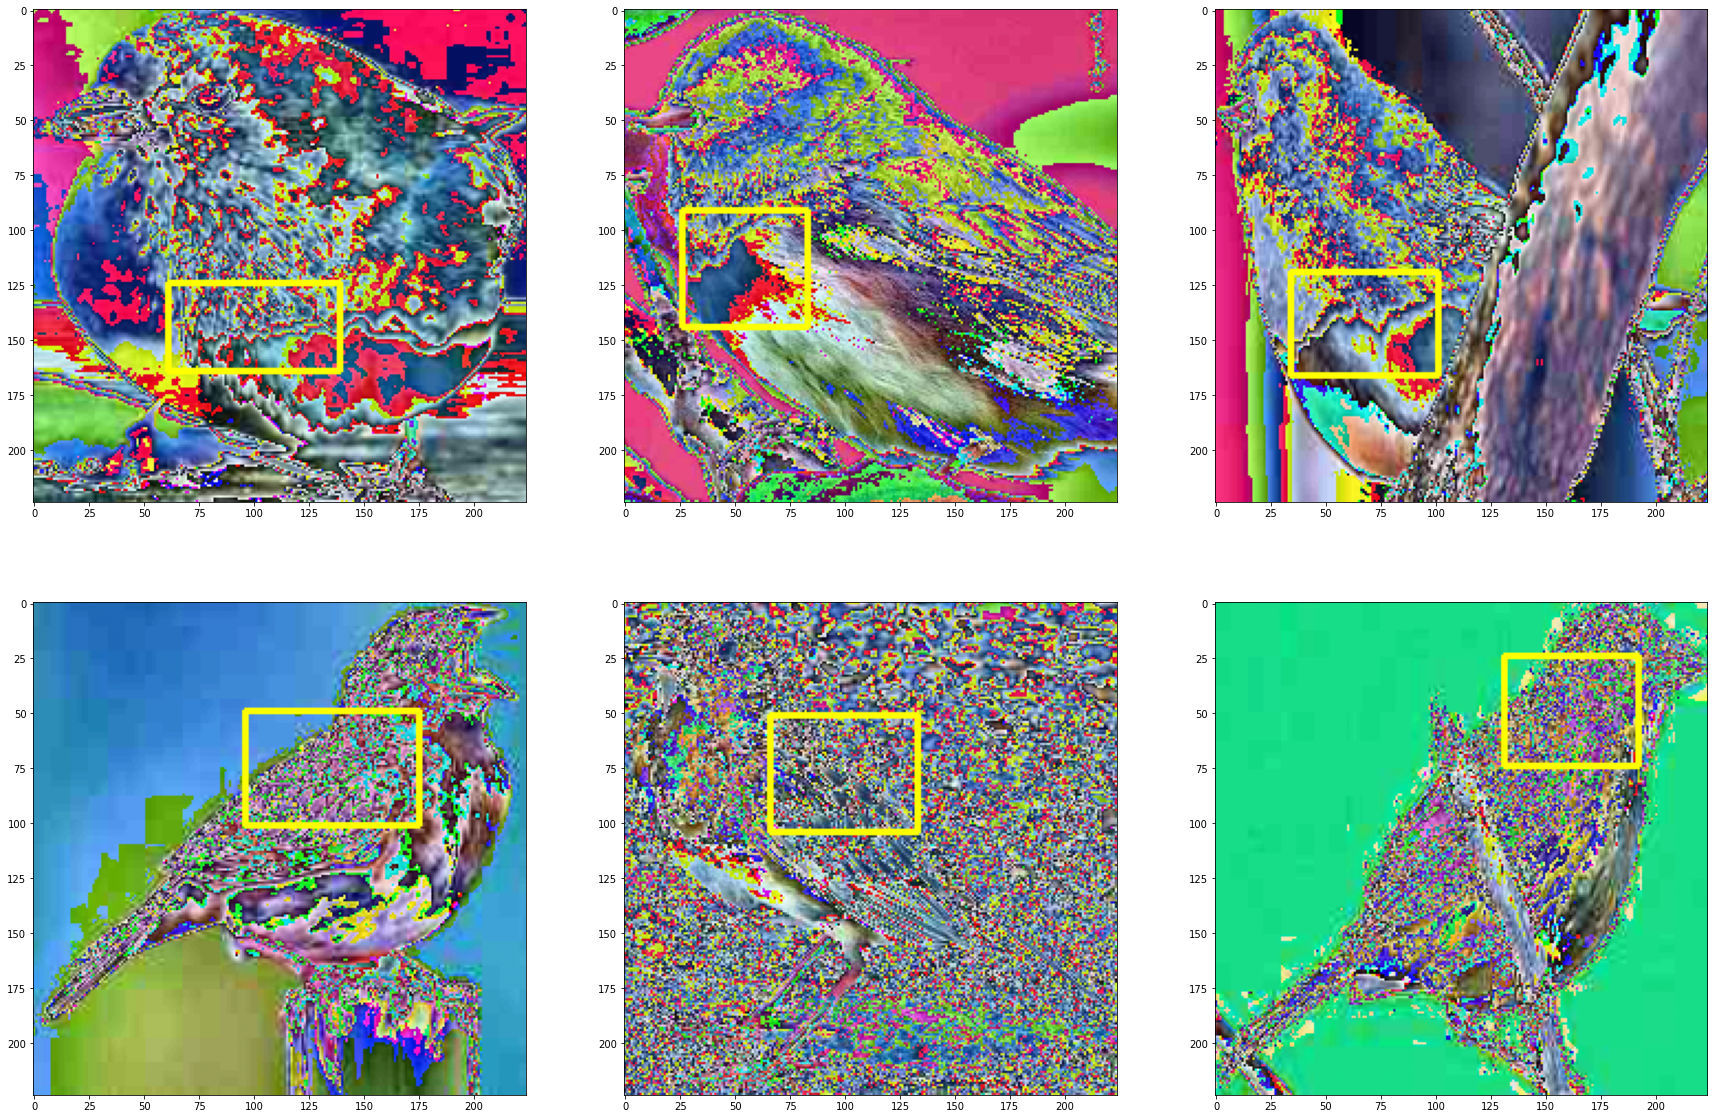

Comparison (-1 for Top, 1 for Bottom, 0 for Neither): 0


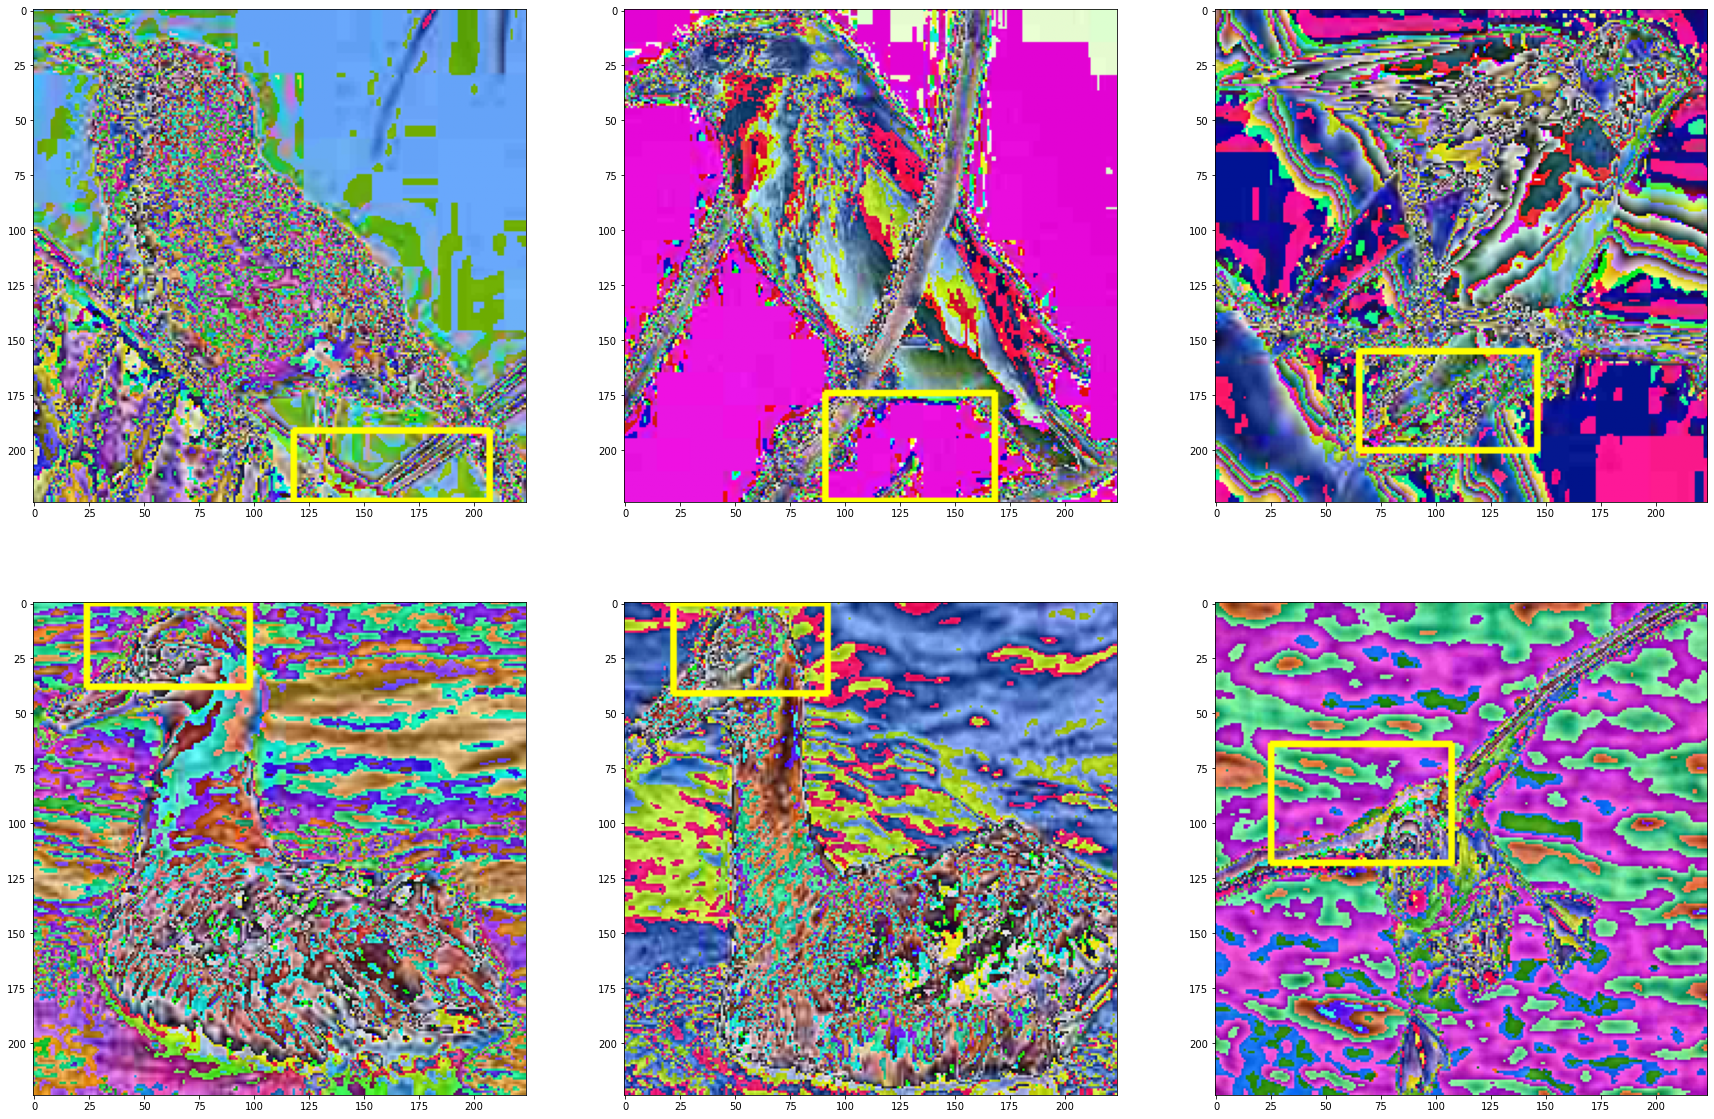

Comparison (-1 for Top, 1 for Bottom, 0 for Neither): 1


In [90]:
for i in range(2):
    # Get left choice
    left_dir = npr.choice(dirs)
    left_names = []
    left_imgs = []
    for j in range(1, k+1):
        nearest_j = left_dir + 'nearest-' + str(j) + '_high_act_patch_in_original_img.png'
        left_names.append(nearest_j)
        left_img = skio.imread(nearest_j)
        left_img = sk.img_as_float(left_img)
        left_imgs.append(left_img)

    # Get right choice
    right_dir = npr.choice(dirs)
    right_names = []
    right_imgs = []
    for j in range(1, k+1):
        nearest_j = right_dir + 'nearest-' + str(j) + '_high_act_patch_in_original_img.png'
        right_names.append(nearest_j)
        right_img = skio.imread(nearest_j)
        right_img = sk.img_as_float(right_img)
        right_imgs.append(right_img)
        
    fig, axes = plt.subplots(2, k, figsize=(30,20))
    for j in range(k):
        axes[0][j].imshow(left_imgs[j])
        axes[1][j].imshow(right_imgs[j])

    plt.pause(0.01)
    # query for comparison
    comp_val = input("Comparison (-1 for Top, 1 for Bottom, 0 for Neither):")


    # append to df
    comp_df = comp_df.append(pd.DataFrame({"left": [left_dir], "right": [right_dir], "comp": [comp_val]}))


In [91]:
len(comp_df)

2

In [92]:
comp_df.to_csv(csv_name)
print(comp_df)

                                                left  \
0  /scratch/users/jiaxun1218/saved_models/vgg19/0...   
0  /scratch/users/jiaxun1218/saved_models/vgg19/0...   

                                               right comp  
0  /scratch/users/jiaxun1218/saved_models/vgg19/0...    0  
0  /scratch/users/jiaxun1218/saved_models/vgg19/0...    1  


In [12]:
# Get the Comparisons
#for _ in range(0, 100):
#    images = []
#    
#    
    # Get left choice
#    left_choice = npr.choice(dirs)
#    lproto_dirs = os.listdir(left_choice)
#    lproto_choice = npr.choice(lproto_dirs).decode()
    
#    if not os.path.isdir(left_choice + lproto_choice):
#        continue
    
#    left_name = left_choice + lproto_choice
#    lsub_imgs = []
#    for j in range(1, k + 1):
#        img = left_choice + lproto_choice + "/nearest-" + str(j) + "_high_act_patch_in_original_img.png"
#    
#        img = cv2.imread(img)
#        lsub_imgs.append(img)
#    images.append(lsub_imgs)
#    
#    # Get right choice
#    right_choice = npr.choice(dirs)
#    rproto_dirs = os.listdir(right_choice)
#    rproto_choice = npr.choice(rproto_dirs).decode()
#    
#    if not os.path.isdir(right_choice + rproto_choice):
#        continue
    
#    right_name = right_choice + rproto_choice
#    rsub_imgs = []
#    for j in range(1, k + 1):
#        img = right_choice + rproto_choice + "/nearest-" + str(j) + "_high_act_patch_in_original_img.png"
#    
#        img = cv2.imread(img)
#        rsub_imgs.append(img)
#    images.append(rsub_imgs)
    
    
#    f, axarr = plt.subplots(len(images), len(images[0]), figsize=(20,20)) 
#    for i in range(len(images)):
#        for j in range(len(images[0])):

#            axarr[i, j].imshow(images[i][j])
#            axarr[i, j].axis('off')
            
#    plt.figure(figsize=(30, 30), dpi=800)
            
#    plt.show()
    # query for comparison
#    comp_val = input("Comparison (-1 for Top, 1 for Bottom, 0 for Neither):")
    
    
    # append to df
#    comp_df = comp_df.append(pd.DataFrame({"left": [left_name], "right": [right_name], "comp": [comp_val]}))
    

In [42]:
comp_df.shape

(0, 3)

In [ ]:
save = False

In [41]:
if save:
    comp_df.to_csv(csv_name, index = False)

NameError: name 'save' is not defined